In [3]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.20.0
ipykernel        : 6.28.0
ipywidgets       : 7.6.5
jupyter_client   : 8.6.0
jupyter_core     : 5.5.0
jupyter_server   : 2.10.0
jupyterlab       : 4.0.11
nbclient         : 0.8.0
nbconvert        : 7.10.0
nbformat         : 5.9.2
notebook         : 7.0.8
qtconsole        : 5.4.2
traitlets        : 5.7.1


In [2]:
# libraries

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
# defining file path
path = "./data/"

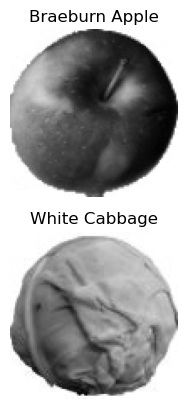

In [54]:
# an example

img1 = load_img(path + "Apple Braeburn 1/r_123_100.jpg")
img2 = load_img(path + "Cabbage white 1/r0_0_100.jpg")


#分别展示3个通道
#plt.subplot(2,1,1)
#plt.imshow(img1)
#plt.title(r'Braeburn Apple')
#plt.axis('off')

#plt.subplot(2,1,2)
#plt.imshow(img2)
#plt.title(r'White Cabbage')
#plt.axis('off')

# 打开图像并转换为灰度
#img1_gray = img1.convert('L')
#img2_gray = img2.convert('L')

# 显示图像
plt.subplot(2,1,1)
plt.imshow(img1_gray, cmap='gray')
plt.title(r'Braeburn Apple')
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(img2_gray, cmap='gray')
plt.title(r'White Cabbage')
plt.axis('off')

plt.show()

In [1]:
import cv2
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image
import warnings

warnings.filterwarnings('ignore')

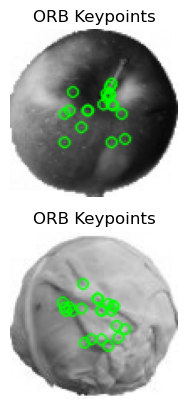

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = load_img('./data/Apple Braeburn 1/r_123_100.jpg')
img2 = load_img('./data/Training/Cabbage white 1/r0_0_100.jpg')

img1_gray = img1.convert('L')
Gray1 = np.array(img1_gray)

img2_gray = img2.convert('L')
Gray2 = np.array(img2_gray)

# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp1 = orb.detect(Gray1,None)
kp2 = orb.detect(Gray2,None)

# compute the descriptors with ORB
kp1, des1 = orb.compute(Gray1, kp1)
kp2, des2 = orb.compute(Gray2, kp2)

# draw only keypoints location,not size and orientation
img21 = cv2.drawKeypoints(Gray1, kp1, None, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
img22 = cv2.drawKeypoints(Gray2, kp2, None, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
#cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
#cv2.DRAW_RICH_KEYPOINTS
#cv2.DRAW_MATCHES_FLAGS_DEFAULT

# 显示图像
plt.subplot(2,1,1)
plt.imshow(img21, cmap='gray')
plt.title(r'ORB Keypoints')
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(img22, cmap='gray')
plt.title(r'ORB Keypoints')
plt.axis('off')

plt.show()


In [4]:
## 获取两个类型训练数据的各个维度的数据
import os
import cv2

# 设置图片文件夹路径
Apple_path = "./data/Apple Braeburn 1/"
Cabbage_path = "./data/Cabbage white 1/"

# 获取所有图片文件名
image_apple_files = [f for f in os.listdir(Apple_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))]
image_cabbage_files = [f for f in os.listdir(Cabbage_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))]

In [31]:
import cv2
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image
import warnings

warnings.filterwarnings('ignore')

# 存储特征和标签
X = []
y = []

# 按顺序读取图片
#for img_name in sorted(image_apple_files):  # 使用 sorted 保证顺序
for img_name in sorted(image_cabbage_files):  # 使用 sorted 保证顺序
    #img_path = os.path.join(Apple_path, img_name)  
    img_path = os.path.join(Cabbage_path, img_name)      
    # 读取图片，转换为灰度图
    #image = cv2.imread(img_path)
    image = load_img(img_path)
    gray_image = image.convert('L')
    Gray = np.array(gray_image)
    #Gra = Gray.reshape(-1,1)
    # 初始化ORB
    orb = cv2.ORB_create()

    # 提取ORB特征
    keypoints, descriptors = orb.detectAndCompute(Gray, None)

    if descriptors is None:
        continue  # 跳过没有特征点的图像 
    # 计算描述符的均值（简单降维方法）
    feature_vector = np.mean(descriptors, axis=0)
    label=0
        
    X.append(feature_vector)
    y.append(label)
    
    # 显示图片（可选）
    #cv2.imshow("Image", image)
    #cv2.waitKey(500)  # 显示 500 毫秒
    #cv2.destroyAllWindows()

    #print(f"Loaded: {img_name}, Shape: {image.shape}")  # 输出图片信息




In [ ]:
# 转换为NumPy数组
X = np.array(X)
y = np.array(y)
#X.shape
y = y.reshape(-1,1)
y.shape

In [33]:
# 方使用 np.concatenate（按列 axis=1）
result1 = np.concatenate((y,X), axis=1)
result1.shape

(144, 33)